In [844]:
# Imports
import numpy
import matplotlib.pyplot as plt
import scipy.io

In [845]:
# Declarations

# Paths
SUBJECT_A_TRAIN_PATH = '../dataset/Matlab Format/Subject_A_Train.mat'
SUBJECT_A_TEST_PATH = '../dataset/Matlab Format/Subject_A_Test.mat'
SUBJECT_B_TRAIN_PATH = '../dataset/Matlab Format/Subject_B_Train.mat'
SUBJECT_B_TEST_PATH = '../dataset/Matlab Format/Subject_A_Test.mat'

# Input Constants
EPOCHS = 85
CHANNELS = 64
EXTRACTED_CHANNEL = 51 #Pz
INTENSIFICATIONS = 12
WINDOW = 240

# 6x6 Grid That Is Displayed To The User
MATRIX = numpy.array(['A', 'B', 'C', 'D', 'E', 'F', \
                      'G', 'H', 'I', 'J', 'K', 'L', \
                      'M', 'N', 'O', 'P', 'Q', 'R', \
                      'S', 'T', 'U', 'V', 'W', 'X', \
                      'Y', 'Z', '1', '2', '3', '4', \
                      '5', '6', '7', '8', '9', '_'])

In [846]:
# Loading Data
Subject_A_Train = scipy.io.loadmat(SUBJECT_A_TRAIN_PATH)
Subject_A_Test = scipy.io.loadmat(SUBJECT_A_TEST_PATH)
Subject_B_Train = scipy.io.loadmat(SUBJECT_B_TRAIN_PATH)
Subject_B_Test = scipy.io.loadmat(SUBJECT_B_TEST_PATH)

In [847]:
# Detection

# A
Subject_A_Signal_Train = numpy.array(Subject_A_Train.get('Signal'));
Subject_A_TargetChar_Train = numpy.array(Subject_A_Train.get('TargetChar'));
Subject_A_Flashing_Train = numpy.array(Subject_A_Train.get('Flashing'));
Subject_A_StimulusCode_Train = numpy.array(Subject_A_Train.get('StimulusCode'));
Subject_A_StimulusType_Train = numpy.array(Subject_A_Train.get('StimulusType'));
print('Subject A Signal Train:', Subject_A_Signal_Train.shape)
print('Subject A TargetChar Train:', Subject_A_TargetChar_Train.shape)
print('Subject A Flashing Train:', Subject_A_Flashing_Train.shape)
print('Subject A StimulusCode Train:', Subject_A_StimulusCode_Train.shape)
print('Subject A StimulusType Train:', Subject_A_StimulusType_Train.shape)

# B
Subject_B_Signal_Train = numpy.array(Subject_B_Train.get('Signal'));
Subject_B_TargetChar_Train = numpy.array(Subject_B_Train.get('TargetChar'));
Subject_B_Flashing_Train = numpy.array(Subject_B_Train.get('Flashing'));
Subject_B_StimulusCode_Train = numpy.array(Subject_B_Train.get('StimulusCode'));
Subject_B_StimulusType_Train = numpy.array(Subject_B_Train.get('StimulusType'));
print('\nSubject B Signal Train:', Subject_B_Signal_Train.shape)
print('Subject B TargetChar Train:', Subject_B_TargetChar_Train.shape)
print('Subject B Flashing Train:', Subject_B_Flashing_Train.shape)
print('Subject B StimulusCode Train:', Subject_B_StimulusCode_Train.shape)
print('Subject B StimulusType Train:', Subject_B_StimulusType_Train.shape)

Subject A Signal Train: (85, 7794, 64)
Subject A TargetChar Train: (1,)
Subject A Flashing Train: (85, 7794)
Subject A StimulusCode Train: (85, 7794)
Subject A StimulusType Train: (85, 7794)

Subject B Signal Train: (85, 7794, 64)
Subject B TargetChar Train: (1,)
Subject B Flashing Train: (85, 7794)
Subject B StimulusCode Train: (85, 7794)
Subject B StimulusType Train: (85, 7794)


In [850]:
# Function To Get Average Of All Signals (And Channels) Within 1 Run
def get_runs_average(
        signals,
        stimulus_code,
        intensifications = 12,
        repeatitions = 1,
        window = 240,
        average_channels = True
    ):
    
    """
    Function To Get Average Of All Signals (And Channels) Within 1 Run
    ------------------------------------------------------------------
    
    signals: Numpy Array: Signals Received From The BCI Device (Dims: (samples, channels))
    stimulus_code: Numpy Array: Indicates Which Row/Column Is Intensified (Dims: (samples))
    intensifications: Integer: Rows + Columns: Default Is 12
    repeatitions: Integer: Indicates How Many Times Each Row/Column Intensified: Default Is 1
    window: Integer: Size of Checked Samples (Signal Digitization): Default Is 240 (1s)
    average_channels: Boolean: To Signify Whether The Channels Will Be Averaged Or Not: Default Is True
    """
    
    # Sum of All Repeatitions -> Division of Sum -> Average
    responses = numpy.zeros((intensifications, window, signals.shape[1]))
    for n in range(1, Subject_A_Signal_Train.shape[1]):
        if stimulus_code[n] == 0 and stimulus_code[n - 1] != 0:
            responses[int(stimulus_code[n - 1]) - 1] += signals[n - 24 : n + window - 24]
    average_responses = responses / repeatitions
    
    # Average Of Channels
    if(average_channels):
        average_responses = numpy.mean(average_responses, axis = 2)
    
    return average_responses

In [851]:
# Function To Get Average Of All Signals (And Channels) Within 1 Session
def get_sessions_average(
        signals,
        stimulus_code,
        target_char,
        no_of_rows = 6,
        no_of_columns = 6,
        repeatitions = 1,
        window = 240,
        average_channels = True
    ):
    
    """
    Function To Get Average Of All Signals (And Channels) Within 1 Session
    ----------------------------------------------------------------------
    
    signals: Numpy Array: Signals Received From The BCI Device (Dims: (epochs, samples, channels))
    stimulus_code: Numpy Array: Indicates Which Row/Column Is Intensified (Dims: (epochs, samples))
    target_char: String: Indicates Target Character
    no_of_rows: Integer: Number of Rows: Default Is 6
    no_of_columns: Integer: Number of Columns: Default Is 6
    repeatitions: Integer: Indicates How Many Times Each Row/Column Intensified: Default Is 1
    window: Integer: Size of Checked Samples (Signal Digitization): Default Is 240 (1s)
    average_channels: Boolean: To Signify Whether The Channels Will Be Averaged Or Not: Default Is True
    """
    
    if(average_channels):
        sum_average_responses_Success = numpy.zeros((window))
        sum_average_responses_Fail = numpy.zeros((window))
    else:
        sum_average_responses_Success = numpy.zeros((window, signals.shape[2]))
        sum_average_responses_Fail = numpy.zeros((window, signals.shape[2]))
    
    intensifications = no_of_rows + no_of_columns
    
    # Looping Through Characters (85 Character)
    for epoch in range(1, signals.shape[0]):

        average_responses = get_runs_average(
            signals[epoch],
            stimulus_code[epoch],
            intensifications,
            repeatitions,
            window,
            average_channels
        )

        # Getting Index Of Chosen Character
        index = numpy.where(MATRIX == target_char[epoch])[0][0]
        chosen_column = index % no_of_columns
        chosen_row = int((index / no_of_columns) % no_of_rows) + no_of_columns


        for row_column in range(intensifications):
            if row_column == chosen_row or row_column == chosen_column:
                sum_average_responses_Success += average_responses[row_column]
            else:
                sum_average_responses_Fail += average_responses[row_column]

    average_responses_Success = sum_average_responses_Success / (signals.shape[0] * 2)
    average_responses_Fail = sum_average_responses_Fail / (signals.shape[0] * (intensifications - 2))
    
    return average_responses_Success, average_responses_Fail

In [852]:
A_Success, A_Fail = get_sessions_average(
    Subject_A_Signal_Train,
    Subject_A_StimulusCode_Train,
    Subject_A_TargetChar_Train[0],
    repeatitions = 15
)

B_Success, B_Fail = get_sessions_average(
    Subject_B_Signal_Train,
    Subject_B_StimulusCode_Train,
    Subject_B_TargetChar_Train[0],
    repeatitions = 15
)

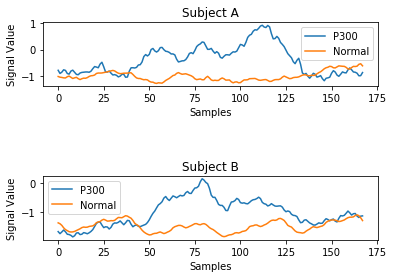

In [853]:
# A
ax1 = plt.subplot(3, 1, 1)
ax1.plot(A_Success[:168])
ax1.plot(A_Fail[:168])
ax1.set_title('Subject A')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Signal Value')
ax1.legend(('P300','Normal'))

# B
ax2 = plt.subplot(3, 1, 3)
ax2.plot(B_Success[:168])
ax2.plot(B_Fail[:168])
ax2.set_title('Subject B')
ax2.set_xlabel('Samples')
ax2.set_ylabel('Signal Value')
ax2.legend(('P300','Normal'))